# Name : Ankita Patra
* B-Number : B01101280

below is the code for this : Scikit-learn to fit one SVM classifier for multi-label classification (dataset should have at least 100 samples so i am taking 150 )


-> all requirement I mentioned in one plot.

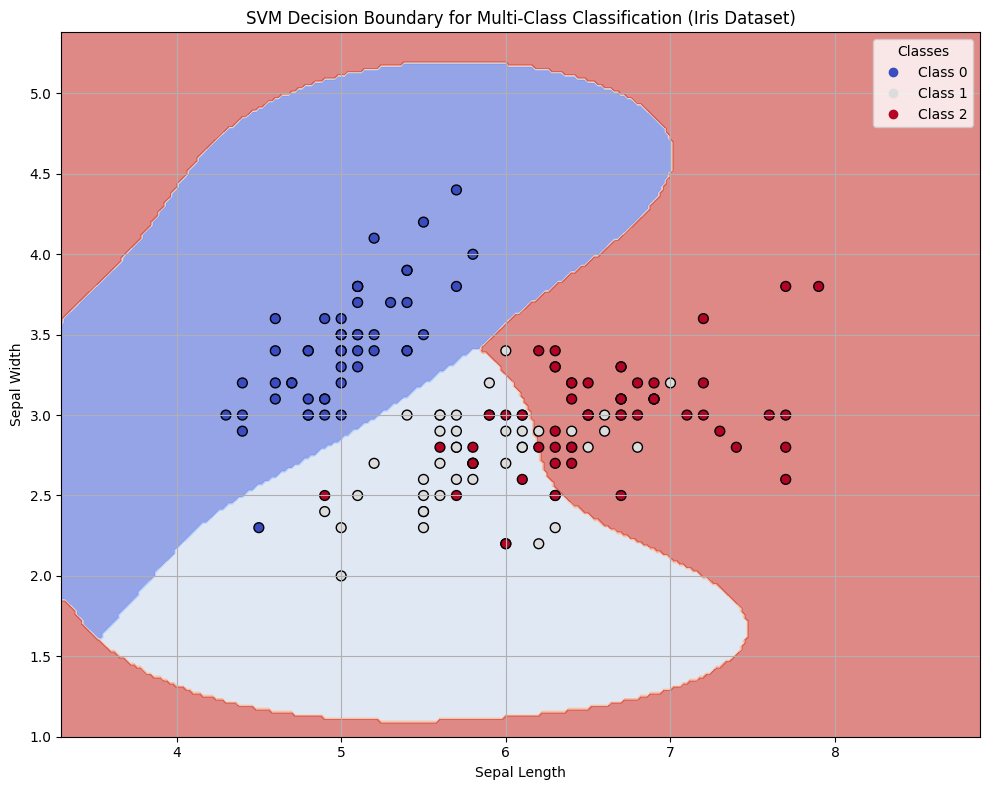

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load Iris dataset (150 samples, 3 classes)
iris = datasets.load_iris()
X = iris.data[:, :2]  # only first 2 features for 2D visualization
y = iris.target

# Train one single SVM classifier for multi-class classification
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='auto', decision_function_shape='ovo'))
model.fit(X, y)

# Plotting the decision boundary
def plot_decision_boundary(clf, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, s=50)

    # Legend
    handles, labels = scatter.legend_elements(prop="colors")
    class_labels = ['Class 0', 'Class 1', 'Class 2']
    plt.legend(handles, class_labels, title="Classes", loc='upper right')

    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('SVM Decision Boundary for Multi-Class Classification (Iris Dataset)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_decision_boundary(model, X, y)


* fitting separate classifiers for two classes at a time (binary). Multi-class (0, 1) and decision boundary ploting . So this code gave 3 plot for each req.

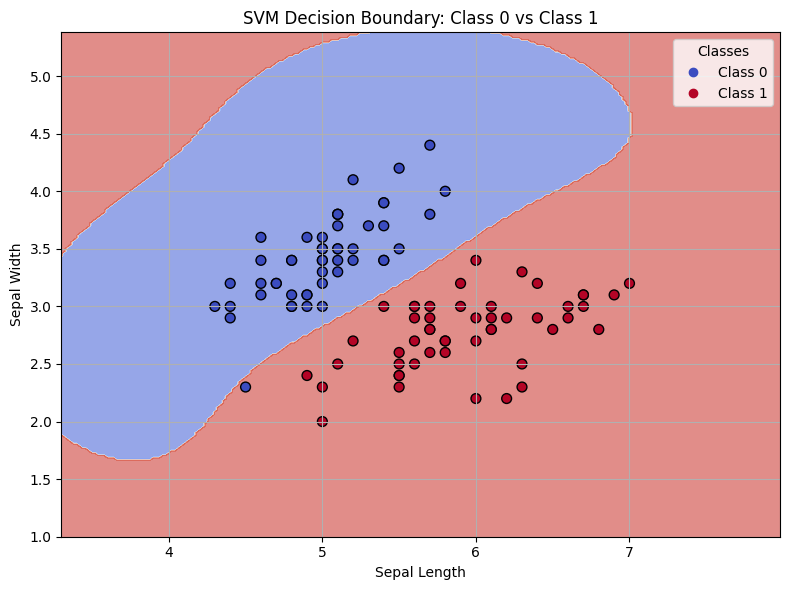

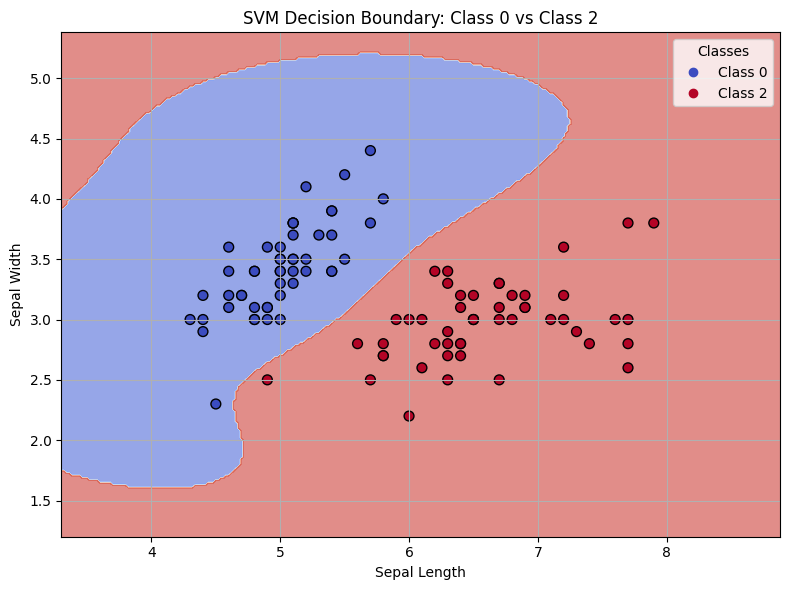

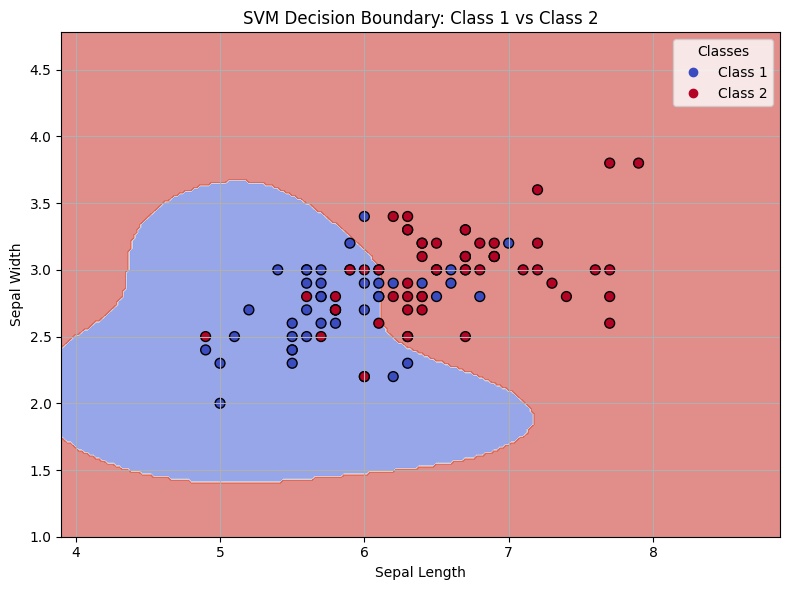

In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load the Iris dataset
iris = datasets.load_iris()
X_full = iris.data[:, :2]  # Use the first two features for 2D visualization
y_full = iris.target       # Class labels (0, 1, 2)

# Function to plot decision boundary between two classes
def plot_two_classes(X, y, class1, class2):
    # Select only the two classes
    idx = np.where((y == class1) | (y == class2))
    X_binary = X[idx]
    y_binary = y[idx]

    # Relabel the selected classes as 0 and 1
    y_binary = np.where(y_binary == class1, 0, 1)

    # Create SVM model with RBF kernel and scaling
    model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='auto'))
    model.fit(X_binary, y_binary)

    # Create a mesh to plot the decision boundary
    h = 0.02
    x_min, x_max = X_binary[:, 0].min() - 1, X_binary[:, 0].max() + 1
    y_min, y_max = X_binary[:, 1].min() - 1, X_binary[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict over the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X_binary[:, 0], X_binary[:, 1], c=y_binary, edgecolors='k', cmap=plt.cm.coolwarm, s=50)

    # Add legend
    handles, _ = scatter.legend_elements(prop="colors")
    class_labels = [f"Class {class1}", f"Class {class2}"]
    plt.legend(handles, class_labels, title="Classes", loc='upper right')

    # Labels and title
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(f'SVM Decision Boundary: Class {class1} vs Class {class2}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot SVM decision boundary for each pair of classes
plot_two_classes(X_full, y_full, 0, 1)
plot_two_classes(X_full, y_full, 0, 2)
plot_two_classes(X_full, y_full, 1, 2)
